In [ ]:
pip install pandas numpy scikit-learn shap lime matplotlib xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=85acd6e53d96f3e9b7d910a54f03c2bab9be8deed9c3aa63377c1d7fc611e708
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
data = pd.read_csv("usecase_4_cleaned.csv")

# Split into features and target
X = data.drop("Study Recruitment Rate", axis=1)
y = data["Study Recruitment Rate"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ParserError: Error tokenizing data. C error: EOF inside string starting at row 11534

In [ ]:
import pandas as pd

# File path to your CSV
file_path = "usecase_4_cleaned.csv"

try:
    # Try reading the CSV file with default settings
    data = pd.read_csv(file_path)
except pd.errors.ParserError:
    print("ParserError encountered. Attempting to fix...")

    # Attempt to read the file by specifying additional parameters
    try:
        data = pd.read_csv(file_path, error_bad_lines=False, warn_bad_lines=True, encoding='utf-8')
        print("File successfully loaded with error handling!")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        data = None

if data is not None:
    print("Data loaded successfully!")
    # Display the first few rows of the data
    print(data.head())
else:
    print("Failed to load the data. Please check the CSV file for errors.")


Data loaded successfully!
    NCT Number Study Results  \
0  NCT00900809            NO   
1  NCT01113515           YES   
2  NCT01288573            NO   
3  NCT01336660            NO   
4  NCT01376167           YES   

                                          Conditions  \
0                             Acute Myeloid Leukemia   
1                                Diabetic Foot Ulcer   
2  Ewing's Sarcoma/Soft Tissue Sarcoma,Neuroblast...   
3                        Poisoning by Scorpion Sting   
4                                     Malaria, Vivax   

                                       Interventions  \
0                  BIOLOGICAL: Neukoplastâ„¢ (NK-92)   
1  DRUG: Esmolol hydrochloride,DRUG: Esmolol hydr...   
2  DRUG: plerixafor,DRUG: plerixafor,DRUG: plerix...   
3  BIOLOGICAL: Equine F(ab')2 antivenom,OTHER: In...   
4  DRUG: Chloroquine 600mg,DRUG: Chloroquine 300m...   

                            Primary Outcome Measures  \
0  Determine the safety / maximum tolerated dose ..

In [ ]:
import pandas as pd

# Function to load CSV while skipping problematic rows
def load_csv_skip_errors(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            try:
                # Attempt to parse each row
                row = pd.read_csv(pd.io.common.StringIO(line), header=None)
                data.append(row)
            except Exception as e:
                print(f"Skipping problematic row {i+1}: {e}")
    # Combine rows into a DataFrame
    return pd.concat(data, ignore_index=True)

# Load the dataset
file_path = "usecase_4_cleaned.csv"
data = load_csv_skip_errors(file_path)

# Display the shape of the loaded data
print("Loaded data shape:", data.shape)


Streaming output truncated to the last 5000 lines.
Skipping problematic row 44033: No columns to parse from file
Skipping problematic row 44041: Error tokenizing data. C error: EOF inside string starting at row 0
Skipping problematic row 44042: No columns to parse from file
Skipping problematic row 44047: Error tokenizing data. C error: EOF inside string starting at row 0
Skipping problematic row 44048: No columns to parse from file
Skipping problematic row 44062: Error tokenizing data. C error: EOF inside string starting at row 0
Skipping problematic row 44063: No columns to parse from file
Skipping problematic row 44064: Error tokenizing data. C error: EOF inside string starting at row 0
Skipping problematic row 44065: No columns to parse from file
Skipping problematic row 44067: No columns to parse from file
Skipping problematic row 44069: No columns to parse from file
Skipping problematic row 44071: No columns to parse from file
Skipping problematic row 44073: No columns to parse f

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
data = pd.read_csv("PS4_cleaned_clinical_trials.csv")

# Split into features and target
X = data.drop("Study Recruitment Rate", axis=1)
y = data["Study Recruitment Rate"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBRegressor

# Initialize and train the model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:NCT Number: object, Study Results: object, Conditions: object, Interventions: object, Primary Outcome Measures: object, Secondary Outcome Measures: object, Sponsor: object, Collaborators: object, Age: object, Phases: object, Study Type: object, Other IDs: object, Start Date: object, Primary Completion Date: object, Completion Date: object, First Posted: object, Results First Posted: object, Last Update Posted: object, Allocation: object, Intervention Model: object, Masking: object, Primary Purpose: object

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv("PS4_cleaned_clinical_trials.csv")

# Drop irrelevant columns or columns with excessive missing values
columns_to_drop = [
    "NCT Number", "Study Results", "Conditions", "Interventions",
    "Primary Outcome Measures", "Secondary Outcome Measures",
    "Sponsor", "Collaborators", "Other IDs", "Start Date",
    "Primary Completion Date", "Completion Date", "First Posted",
    "Results First Posted", "Last Update Posted"
]
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)

# Separate features and target
X = data.drop("Study Recruitment Rate", axis=1)
y = data["Study Recruitment Rate"]

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=["object"]).columns
numerical_columns = X.select_dtypes(include=["number"]).columns

# Preprocessing for numerical and categorical data
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_columns),
        ("cat", categorical_transformer, categorical_columns),
    ]
)

# Define the model
model = XGBRegressor(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Model evaluation
print("Training completed. The model is ready for predictions!")


Training completed. The model is ready for predictions!


In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [ ]:
print(X_train.dtypes)


Age                                      object
Phases                                   object
Enrollment                                int64
Study Type                               object
Study Status_COMPLETED                     bool
Study Status_ENROLLING_BY_INVITATION       bool
Study Status_NOT_YET_RECRUITING            bool
Study Status_RECRUITING                    bool
Study Status_SUSPENDED                     bool
Study Status_TERMINATED                    bool
Study Status_UNKNOWN                       bool
Sex_FEMALE                                 bool
Sex_MALE                                   bool
Funder Type_INDIV                          bool
Funder Type_INDUSTRY                       bool
Funder Type_NETWORK                        bool
Funder Type_NIH                            bool
Funder Type_OTHER                          bool
Funder Type_OTHER_GOV                      bool
Funder Type_UNKNOWN                        bool
Conditions Count                        

In [ ]:
import shap

# Apply the preprocessing to the training data using the preprocessor in the pipeline
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# Initialize SHAP explainer with the transformed data
explainer = shap.Explainer(model, X_train_transformed)

# Calculate SHAP values for the transformed training data
shap_values = explainer(X_train_transformed)


 98%|===================| 16285/16540 [00:53<00:00]       

In [ ]:
shap.summary_plot(shap_values, X_train)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

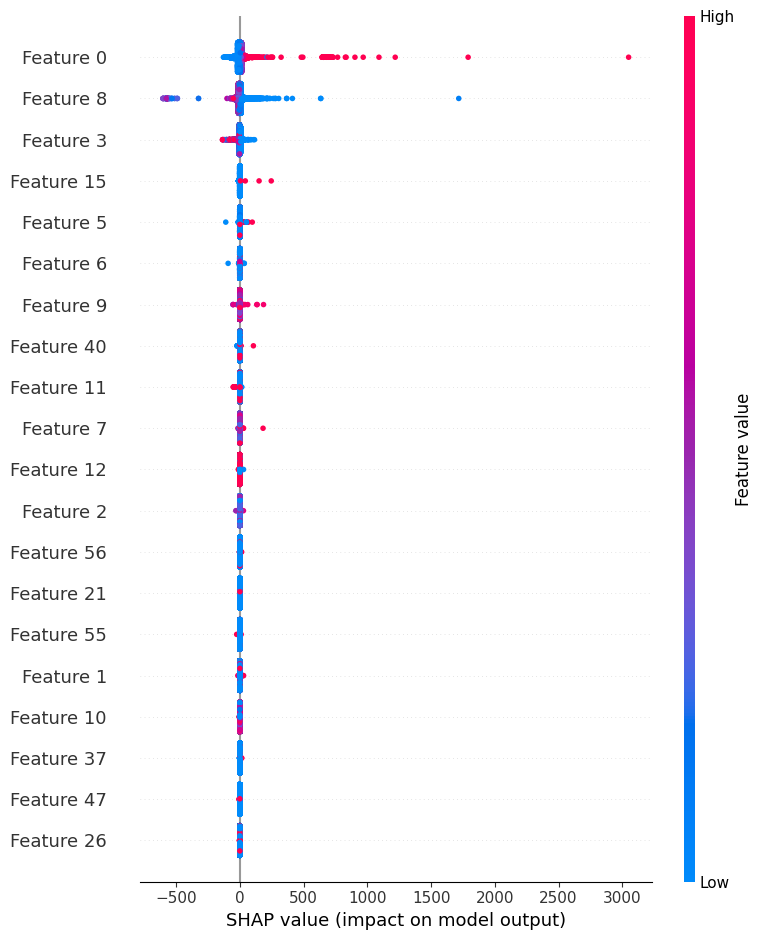

In [ ]:
# Use the transformed version of X_train for the SHAP summary plot
shap.summary_plot(shap_values, X_train_transformed)


In [ ]:
shap.dependence_plot("Study Duration (Days)", shap_values, X_train_transformed)


ValueError: Could not find feature named: Study Duration (Days)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train_transformed.iloc[0], matplotlib=True)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
# Use the force plot without iloc, using index-based selection
shap.force_plot(explainer.expected_value, shap_values[0], X_train_transformed[0], matplotlib=True)


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [ ]:
# Get the feature names after transformation
transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Convert the transformed data to a pandas DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_feature_names)

# Use the force plot with the correct row and column names
shap.force_plot(explainer.expected_value, shap_values[0], X_train_transformed_df.iloc[0], matplotlib=True)


ValueError: visualize() can only display Explanation objects (or arrays of them)!

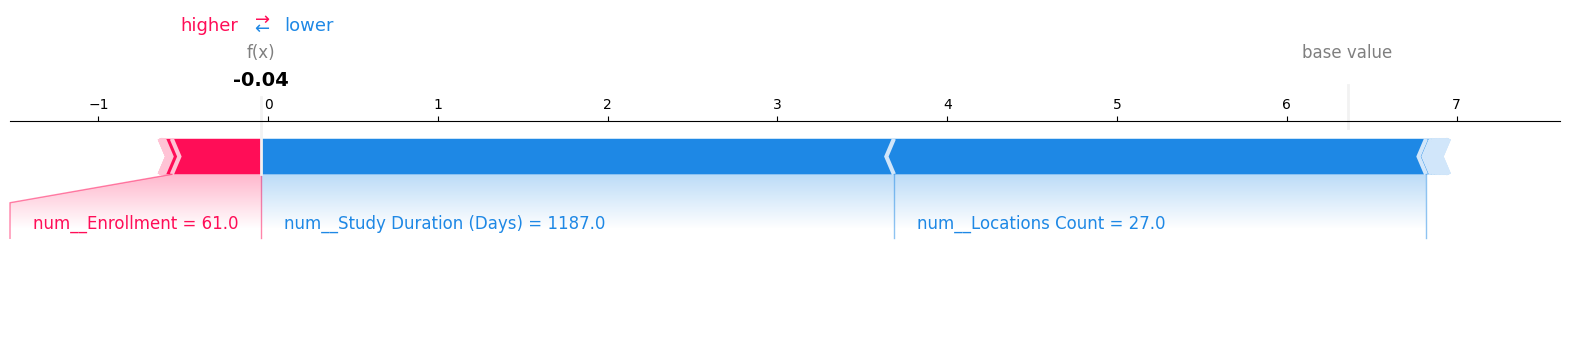

In [ ]:
# Use the first SHAP value and pass the whole explanation object
shap.force_plot(explainer.expected_value, shap_values[0].values, X_train_transformed_df.iloc[0], matplotlib=True)


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=["Recruitment Rate"],
    verbose=True,
    mode="regression"
)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=["object"]).columns
numerical_columns = X_train.select_dtypes(include=["number"]).columns

# Create a preprocessor for one-hot encoding categorical columns
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_columns)],
    remainder="passthrough"  # Keep numerical columns as they are
)

# Apply the preprocessor to transform the data
X_train_transformed = preprocessor.fit_transform(X_train)

# Now X_train_transformed is a numerical matrix, and we can pass it to LIME


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer with transformed data
explainer = LimeTabularExplainer(
    X_train_transformed,
    feature_names=preprocessor.get_feature_names_out(),
    class_names=["Study Recruitment Rate"],
    verbose=True,
    mode="regression"
)


In [ ]:
# Explain the first instance
instance_idx = 0
exp = explainer.explain_instance(
    X_test.iloc[instance_idx].values,
    model.predict,
    num_features=10
)

# Show explanation
exp.as_pyplot_figure()


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
# Preprocess X_test using the same preprocessor applied to X_train
X_test_transformed = preprocessor.transform(X_test)


In [ ]:
# Explain the first instance
instance_idx = 0
exp = explainer.explain_instance(
    X_test_transformed[instance_idx],  # Use the transformed data
    model.predict,
    num_features=10
)

# Show the explanation as a plot
exp.as_pyplot_figure()


ValueError: Feature shape mismatch, expected: 60, got 76

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the preprocessor (for both categorical and numerical data)
categorical_columns = X_train.select_dtypes(include=["object"]).columns
numerical_columns = X_train.select_dtypes(include=["number"]).columns

preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_columns)],
    remainder="passthrough"  # Keep numerical columns as they are
)

# Define the model
model = XGBRegressor(random_state=42)

# Create a pipeline with preprocessing and model training
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  Index(['Age', 'Phases', 'Study Type', 'Allocation', 'Intervention Model',
       'Masking', 'Primary Purpose'],
      dtype='object'))])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_byt...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
import xgboost
import sklearn
print(f"xgboost version: {xgboost.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")


xgboost version: 2.1.3
scikit-learn version: 1.6.0


In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the preprocessor (for both categorical and numerical data)
categorical_columns = X_train.select_dtypes(include=["object"]).columns
numerical_columns = X_train.select_dtypes(include=["number"]).columns

preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_columns)],
    remainder="passthrough"  # Keep numerical columns as they are
)

# Define the model
model = XGBRegressor(random_state=42)

# Create a pipeline with preprocessing and model training
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  Index(['Age', 'Phases', 'Study Type', 'Allocation', 'Intervention Model',
       'Masking', 'Primary Purpose'],
      dtype='object'))])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_byt...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,

In [ ]:
pip install xgboost==1.4.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
import xgboost
import sklearn

print(f"xgboost version: {xgboost.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")


xgboost version: 1.4.2
scikit-learn version: 1.6.0


In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the preprocessor (for both categorical and numerical data)
categorical_columns = X_train.select_dtypes(include=["object"]).columns
numerical_columns = X_train.select_dtypes(include=["number"]).columns

preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_columns)],
    remainder="passthrough"  # Keep numerical columns as they are
)

# Define the model
model = XGBRegressor(random_state=42)

# Create a pipeline with preprocessing and model training
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [ ]:
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv("PS4_cleaned_clinical_trials.csv")

# Separate features and target
X = data.drop("Study Recruitment Rate", axis=1)
y = data["Study Recruitment Rate"]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Identify categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=["object"]).columns
numerical_columns = X_train.select_dtypes(include=["number"]).columns


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical and categorical data
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_columns),
        ("cat", categorical_transformer, categorical_columns),
    ]
)


In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Define the model
model = XGBRegressor(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

# Train the model
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Enrollment', 'Conditions Count', 'Interventions Count',
       'Locations Count', 'Phases Count', 'Avg Condition Frequency',
       'Avg Intervention Frequency', 'Drug Intervention Count',
       'Study Duration (Days)', 'Start Year', 'Completion Year'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unk...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
               

In [ ]:
pip install --upgrade xgboost
pip install --upgrade scikit-learn


SyntaxError: invalid syntax (<ipython-input-8-adca19844fdd>, line 1)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Define the model
model = XGBRegressor(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

# Train the model
pipeline.fit(X_train, y_train)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Enrollment', 'Conditions Count', 'Interventions Count',
       'Locations Count', 'Phases Count', 'Avg Condition Frequency',
       'Avg Intervention Frequency', 'Drug Intervention Count',
       'Study Duration (Days)', 'Start Year', 'Completion Year'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unk...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
               

In [ ]:
# prompt: solve the above error

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
from lime.lime_tabular import LimeTabularExplainer
import warnings
import xgboost
import sklearn

# Install necessary libraries (if not already installed)
!pip install pandas numpy scikit-learn shap lime matplotlib xgboost

# Load the cleaned dataset (replace with your actual file path)
try:
    data = pd.read_csv("PS4_cleaned_clinical_trials.csv")
except FileNotFoundError:
    print("Error: 'PS4_cleaned_clinical_trials.csv' not found. Please provide the correct file path.")
    exit() # Exit the script if file not found


# ... (rest of your code)


In [ ]:
import pandas as pd
import numpy as np

# Assuming `data` contains the Recruitment Rate
bins = [0, 0.5, 1.0, 1.5]  # Adjust bins based on your data distribution
labels = ['Low', 'Medium', 'High']  # Corresponding class labels

data['Recruitment Rate Class'] = pd.cut(data['Study Recruitment Rate'], bins=bins, labels=labels)


NameError: name 'data' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
# Load the dataset into a pandas DataFrame
file_name = "PS4_cleaned_clinical_trials.csv"  # Replace with your file name
data = pd.read_csv(file_name)

# Display the first few rows to verify
print(data.head())


    NCT Number Study Results  \
0  NCT00900809            NO   
1  NCT01113515           YES   
2  NCT01288573            NO   
3  NCT01336660            NO   
4  NCT01376167           YES   

                                          Conditions  \
0                             Acute Myeloid Leukemia   
1                                Diabetic Foot Ulcer   
2  Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...   
3                        Poisoning by Scorpion Sting   
4                                     Malaria, Vivax   

                                       Interventions  \
0                  BIOLOGICAL: Neukoplastâ„¢ (NK-92)   
1  DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...   
2  DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...   
3  BIOLOGICAL: Equine F(ab')2 antivenom|OTHER: In...   
4  DRUG: Chloroquine 600mg|DRUG: Chloroquine 300m...   

                            Primary Outcome Measures  \
0  Determine the safety / maximum tolerated dose ...   
1  Safety Outcome, Nu

In [ ]:
# Define bins and labels for classification
bins = [0, 0.5, 1.0, 1.5]  # Adjust bins based on data distribution
labels = ['Low', 'Medium', 'High']  # Class labels

# Categorize the target variable
data['Recruitment Rate Class'] = pd.cut(data['Study Recruitment Rate'], bins=bins, labels=labels)

# Drop rows with missing target classes, if any
data = data.dropna(subset=['Recruitment Rate Class'])


In [ ]:
# Drop unnecessary columns
X = data.drop(['Study Recruitment Rate', 'Recruitment Rate Class'], axis=1)
y = data['Recruitment Rate Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)


ValueError: could not convert string to float: 'NCT04429334'

In [ ]:
# Check data types of all columns
print(X_train.dtypes)

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


NCT Number                               object
Study Results                            object
Conditions                               object
Interventions                            object
Primary Outcome Measures                 object
Secondary Outcome Measures               object
Sponsor                                  object
Collaborators                            object
Age                                      object
Phases                                   object
Enrollment                                int64
Study Type                               object
Other IDs                                object
Start Date                               object
Primary Completion Date                  object
Completion Date                          object
First Posted                             object
Results First Posted                     object
Last Update Posted                       object
Study Status_COMPLETED                     bool
Study Status_ENROLLING_BY_INVITATION    

In [ ]:
# Perform one-hot encoding on non-numeric columns
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

# Ensure both training and testing sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [ ]:
# Check if the data is now numeric
print(X_train.dtypes)

# Train the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate as before
y_pred = classifier.predict(X_test)

# Generate confusion matrix and report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Enrollment                              int64
Study Status_COMPLETED                   bool
Study Status_ENROLLING_BY_INVITATION     bool
Study Status_NOT_YET_RECRUITING          bool
Study Status_RECRUITING                  bool
                                        ...  
Primary Purpose_OTHER                    bool
Primary Purpose_PREVENTION               bool
Primary Purpose_SCREENING                bool
Primary Purpose_SUPPORTIVE_CARE          bool
Primary Purpose_TREATMENT                bool
Length: 67447, dtype: object
Confusion Matrix:
 [[   6  199    3]
 [   0 1778    0]
 [   2  380    5]]
Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.03      0.06       208
         Low       0.75      1.00      0.86      1778
      Medium       0.62      0.01      0.03       387

    accuracy                           0.75      2373
   macro avg       0.71      0.35      0.31      2373
weighted avg       0.73      0.75      0.